<a href="https://colab.research.google.com/github/JonathanBath/summer-school/blob/master/Analyse_Umbrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JonathanBath/summer-school.git

Cloning into 'summer-school'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 216 (delta 6), reused 5 (delta 2), pack-reused 147
Receiving objects: 100% (216/216), 11.59 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (51/51), done.


/content/summer-school/four


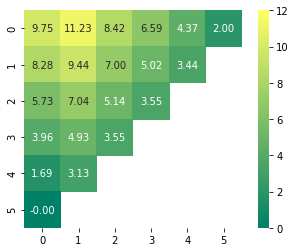

In [13]:
# change directory to 'four', 'five', 'six' for simulations at 30, 40 and 50°C
directory = '/content/summer-school/four'

import pandas as pd
import numpy as np
import seaborn as sns
import os
from functools import reduce

%cd $directory
files = os.listdir();

names = ['Q1','Q2','biased','unbiased','whitespace']

# load all data
data = [pd.read_csv(file, sep=' ', comment='#', names=names).set_index(['Q1','Q2']).drop(['biased','whitespace'], axis=1) for file in files]

# add data for each simulation
data = reduce(lambda x, y: x.add(y, fill_value=0), data)

data = data['unbiased'].to_numpy()
data = data.reshape(6,6)
RT = (1.987 * 303) / 1000 

anticodonWins = data[5,0]

ratio = data/anticodonWins

np.seterr(divide = 'ignore') 
dG = -RT * np.log2(ratio)
sns.heatmap(np.ma.masked_invalid(dG), cmap='summer', annot=True, fmt='.2f', vmin=0, vmax=12, square=True);


In [8]:
dG

array([[ 9.75244739, 11.22712906,  8.41923507,  6.59403706,  4.36981583,
         2.00440272],
       [ 8.28492495,  9.44364764,  7.00319907,  5.02217713,  3.43550923,
                inf],
       [ 5.73014994,  7.0439809 ,  5.14162538,  3.54828261,         inf,
                inf],
       [ 3.96330523,  4.93184597,  3.55342174,         inf,         inf,
                inf],
       [ 1.69075182,  3.1348566 ,         inf,         inf,         inf,
                inf],
       [-0.        ,         inf,         inf,         inf,         inf,
                inf]])